In [1]:
import re
import click
from datetime import datetime
import astropy.time as time
import astropy.table as table
import astropy.units as u
import astropy.constants as const
import numpy as np
import pandas as pd

In [10]:
#wlen_grid = np.linspace(3000, 9000, 1000)
base_sed = 3631 # Jy



In [11]:
def load_filter_curve(instrument='ZTF', band='r'):
    if instrument == 'ZTF':
        dat = table.Table.read('../const/filters/Palomar_ZTF.%s.dat' % band, format='ascii')
        return dat['col1'], dat['col2']

In [29]:
wlen, transmission = load_filter_curve()

pivot_factor2 = np.trapz(wlen*transmission, wlen)/np.trapz(transmission/wlen, wlen)
print('Pivot Factor: %e' % pivot_factor2)

Pivot Factor: 4.123139e+07


In [33]:
# convert to erg/cm^2/s/A
sed_cgs = 2.99792458E-05 * base_sed / wlen ** 2

flux = np.trapz(sed_cgs*transmission*wlen, wlen)/np.trapz(transmission*wlen, wlen)
#flux = np.trapz(sed_cgs*transmission, wlen)
-2.5*np.log10(flux) - 2.5*np.log10(pivot_factor2/const.c.to(u.Angstrom/u.s).value) - 48.6

-6.562228222861677e-05

In [17]:
filter_factor = np.log10(3.631e-20 * (const.c.cgs.value) * np.trapz(transmission/wlen, wlen))
filter_factor

-9.601228527259053

In [27]:
-2.5*np.log10(np.trapz(base_sed/1e23*transmission/wlen, wlen)/np.trapz(transmission/wlen, wlen)) - 48.6

-6.562228222861677e-05

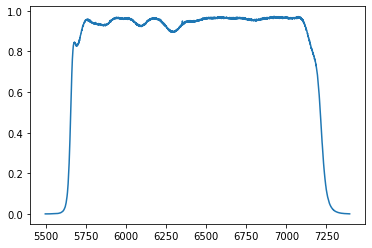

In [25]:
import matplotlib.pyplot as plt
plt.plot(wlen, transmission)